# 기계학습

### 담당교수 : 장원중

In [1]:
# 그래프 한글이 깨질때 & 마이너스 부호 사용

import sys, os
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt

# 한글 폰트 설정 : 윈도우 폰트를 사용하는 경우 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

# 운영체제별 한글 폰트 설정
# if os.name == 'posix': # Mac 환경 폰트 설정
#     rc('font', family='AppleGothic')
# elif os.name == 'nt': # Windows 환경 폰트 설정
#     rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 유니코드에서 음수 부호설정
rc('axes', unicode_minus=False)

# 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append(os.pardir)     

# jupyter에서 matplotlib 그래프를 출력 영역에 표시  
%matplotlib inline 

# 레티나 설정 - 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임
%config InlineBackend.figure_format = 'retina'

In [2]:
# 운영체제별 이름 

import platform

platform.system()

'Windows'

In [3]:
# 파이썬 버전 확인

import sys
import platform

print("--sys.version—")
print(sys.version)

print("--python_version—")
print(platform.python_version())

--sys.version—
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
--python_version—
3.11.7


# Scikit-learn 모듈을 이용한 기계학습 맛보기

## iris 데이터셋

In [48]:
# iris 데이터 불러오기
# sklearn.utils.Bunch 객체는 몇 가지의 key를 제공하며 이를 통해 데이터의 정보를 쉽게 확인할 수 있음

from sklearn.datasets import load_iris

data = load_iris()

print(type(data))      # <class 'sklearn.utils._bunch.Bunch'>
data.keys()            # key를 통해 데이터의 정보를 쉽게 확인  
# dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

<class 'sklearn.utils._bunch.Bunch'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# DESCR을 통해 아이리스 데이터 정보에 대해 알아보자
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
# 독립 변수 이름 
print(data.feature_names)  
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# 종속변수 레이블 
print(data.target_names)  
# ['setosa' 'versicolor' 'virginica']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [50]:
# 필요한 라이브러리를 임포트 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 분석의 용이성을 위해 pandas의 DataFrame으로 변환 
iris = pd.DataFrame(data=data.data, columns=data.feature_names)
print(iris.shape)  # (150, 4) 
iris

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# 타겟 데이터도 Seried 구조로 변환 

target = pd.Series(data.target, dtype="category")
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: category
Categories (3, int64): [0, 1, 2]

In [12]:
# 타겟값을 종속변수의 레이블로 수정함 
target = target.cat.rename_categories(data.target_names)
print(target)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [51]:
# 독립변수로 구성된 데이터프레임에 종속변수 속성을 추가 

iris["species"] = target
print(iris.shape)        # (150, 5)
iris

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
# 열이름 수정
iris.rename({"sepal length (cm)":"sepal_length", "sepal width (cm)": "sepal_width", 
             "petal length (cm)":"petal_length", "petal width (cm)":"petal_width"}, axis=1, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
# 결측값 확인  
iris.isna().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
# info 메서드를 이용하여 DataFrame에 대한 정보를 확인
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [17]:
# describe 메서드를 이용하여 기초 통계량을 확인
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
# corr 메서드를 이용하여 피처끼리의 상관관계를 분석

iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


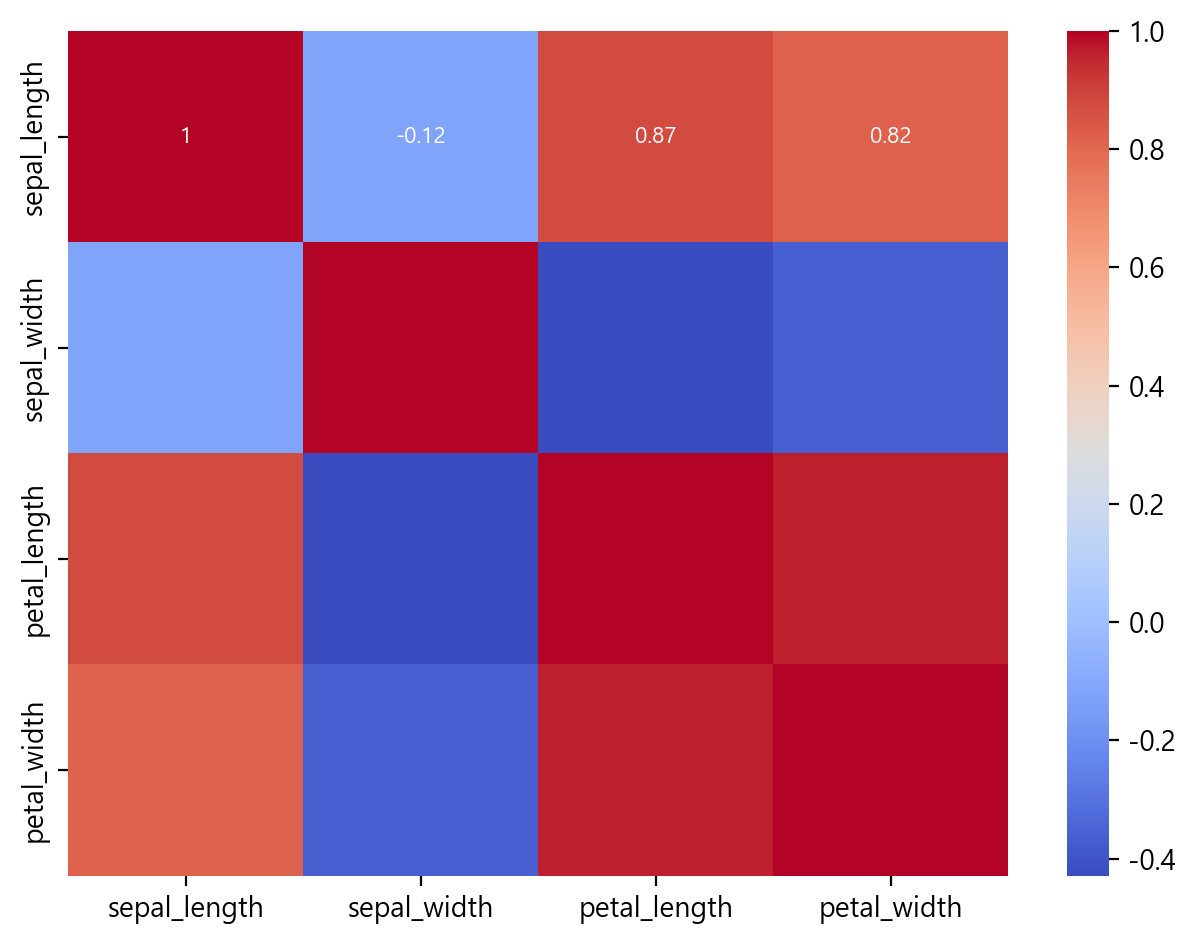

In [25]:
# 히트맵 
# - 독립 변수: "worst radius", "worst texture", "worst perimeter", "worst area"

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(iris.iloc[:,:4].corr(), cmap="coolwarm", annot=True, annot_kws={"fontsize":8})
plt.tight_layout()
plt.show()

In [26]:
# groupby 메서드를 이용하여 타겟별 기술 통계 분석 
iris.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

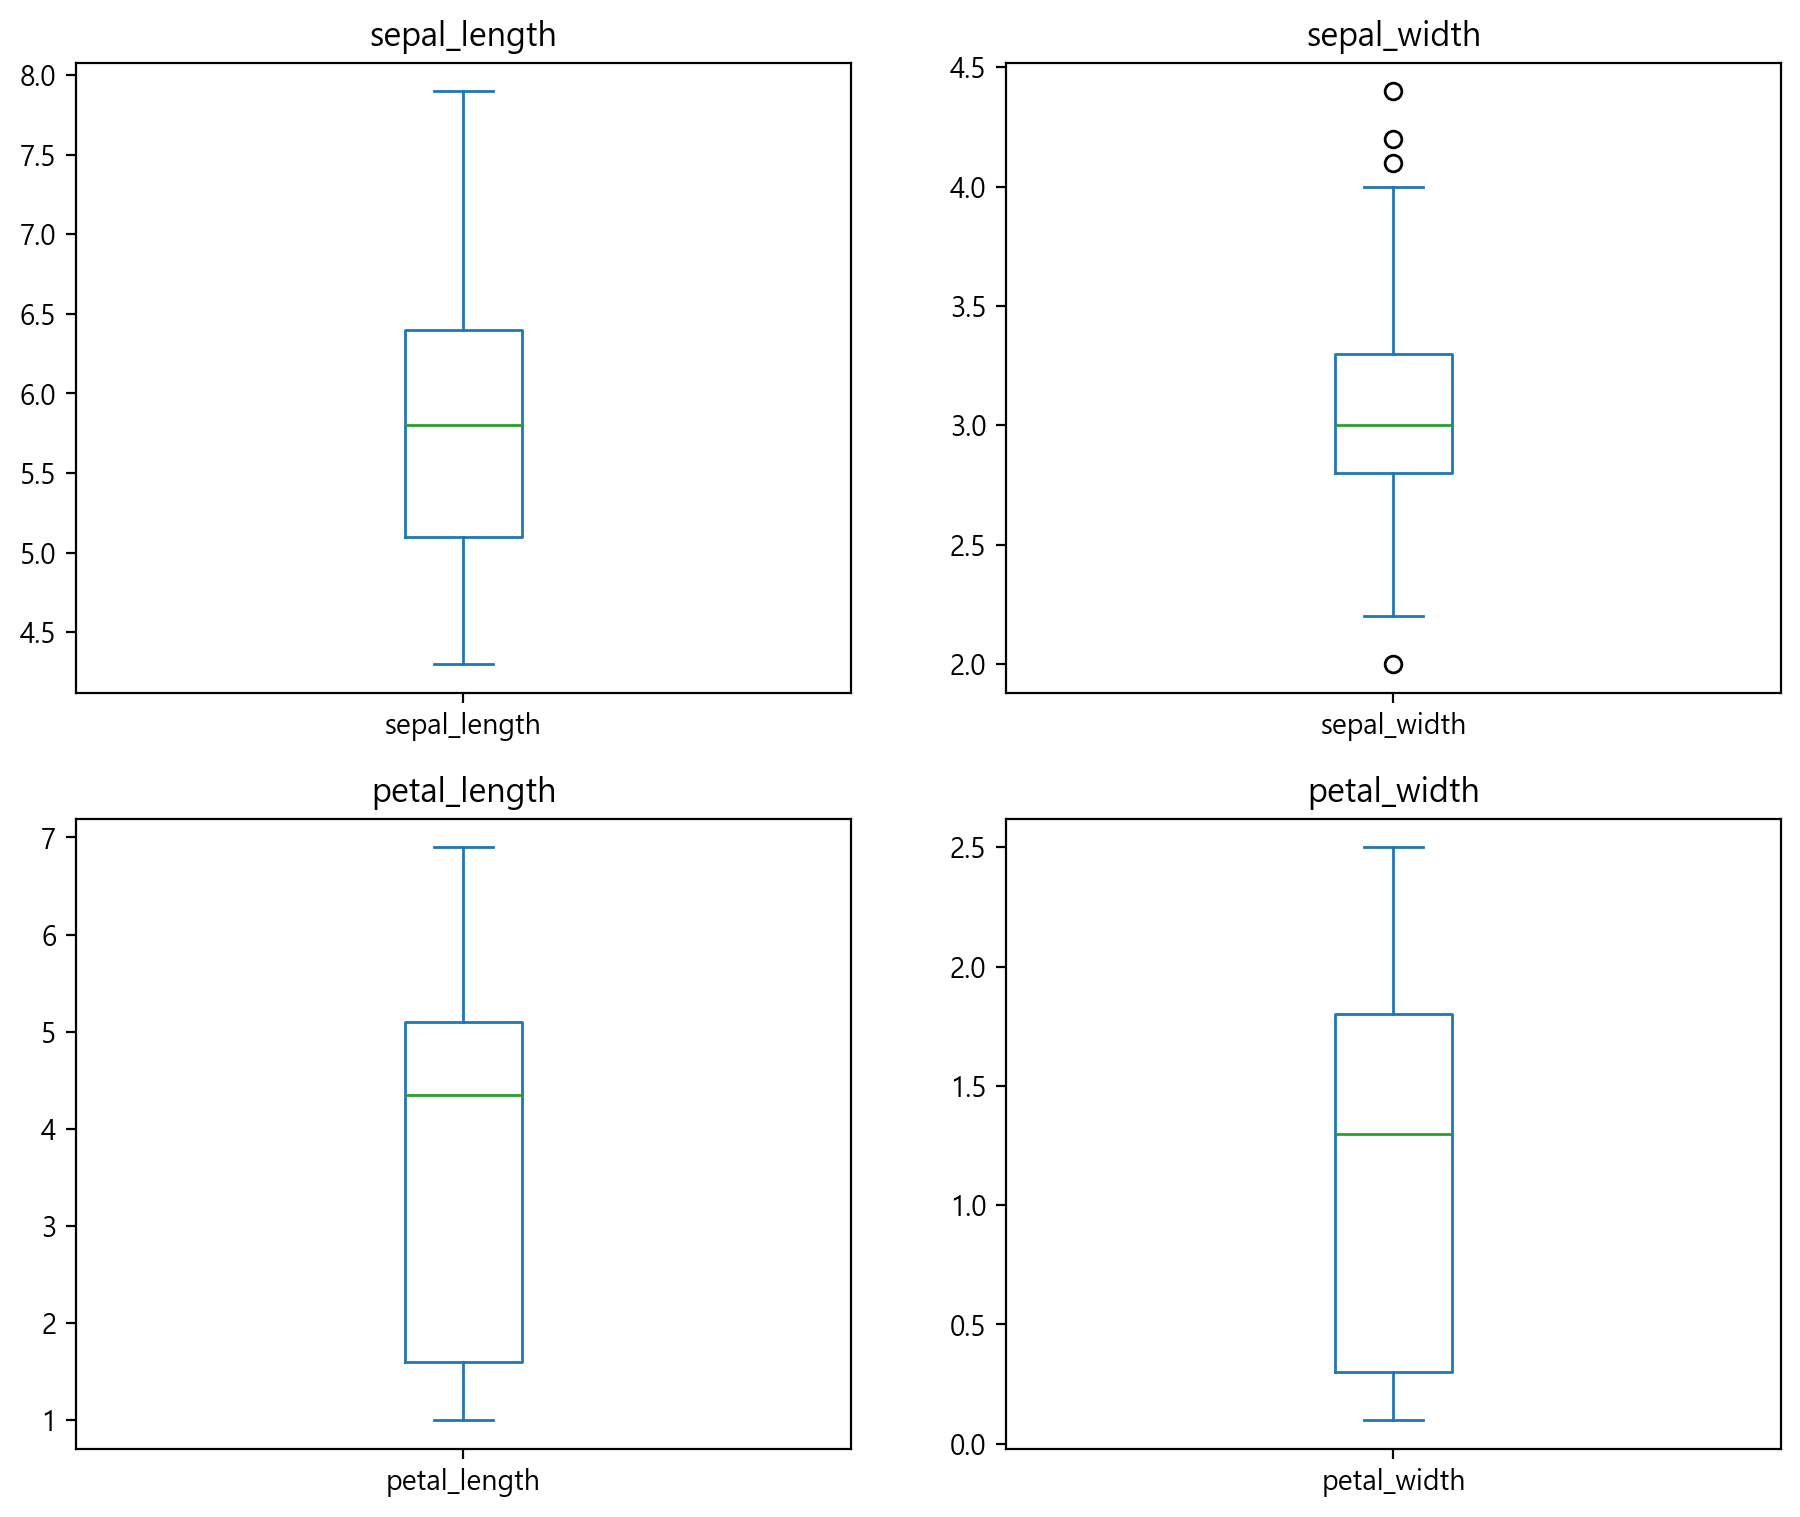

In [28]:
# boxplot을 그려 기초 통계량을 시각화하고 이상치를 탐지
def boxplot_iris(feature_names, dataset):
    plt.figure(figsize=(11, 9))
    for i, col in enumerate(feature_names, 1):
        plt.subplot(2, 2, i)
        dataset[col].plot(kind="box")
        plt.title(col)
    plt.show()

boxplot_iris(iris.columns[:-1], iris)

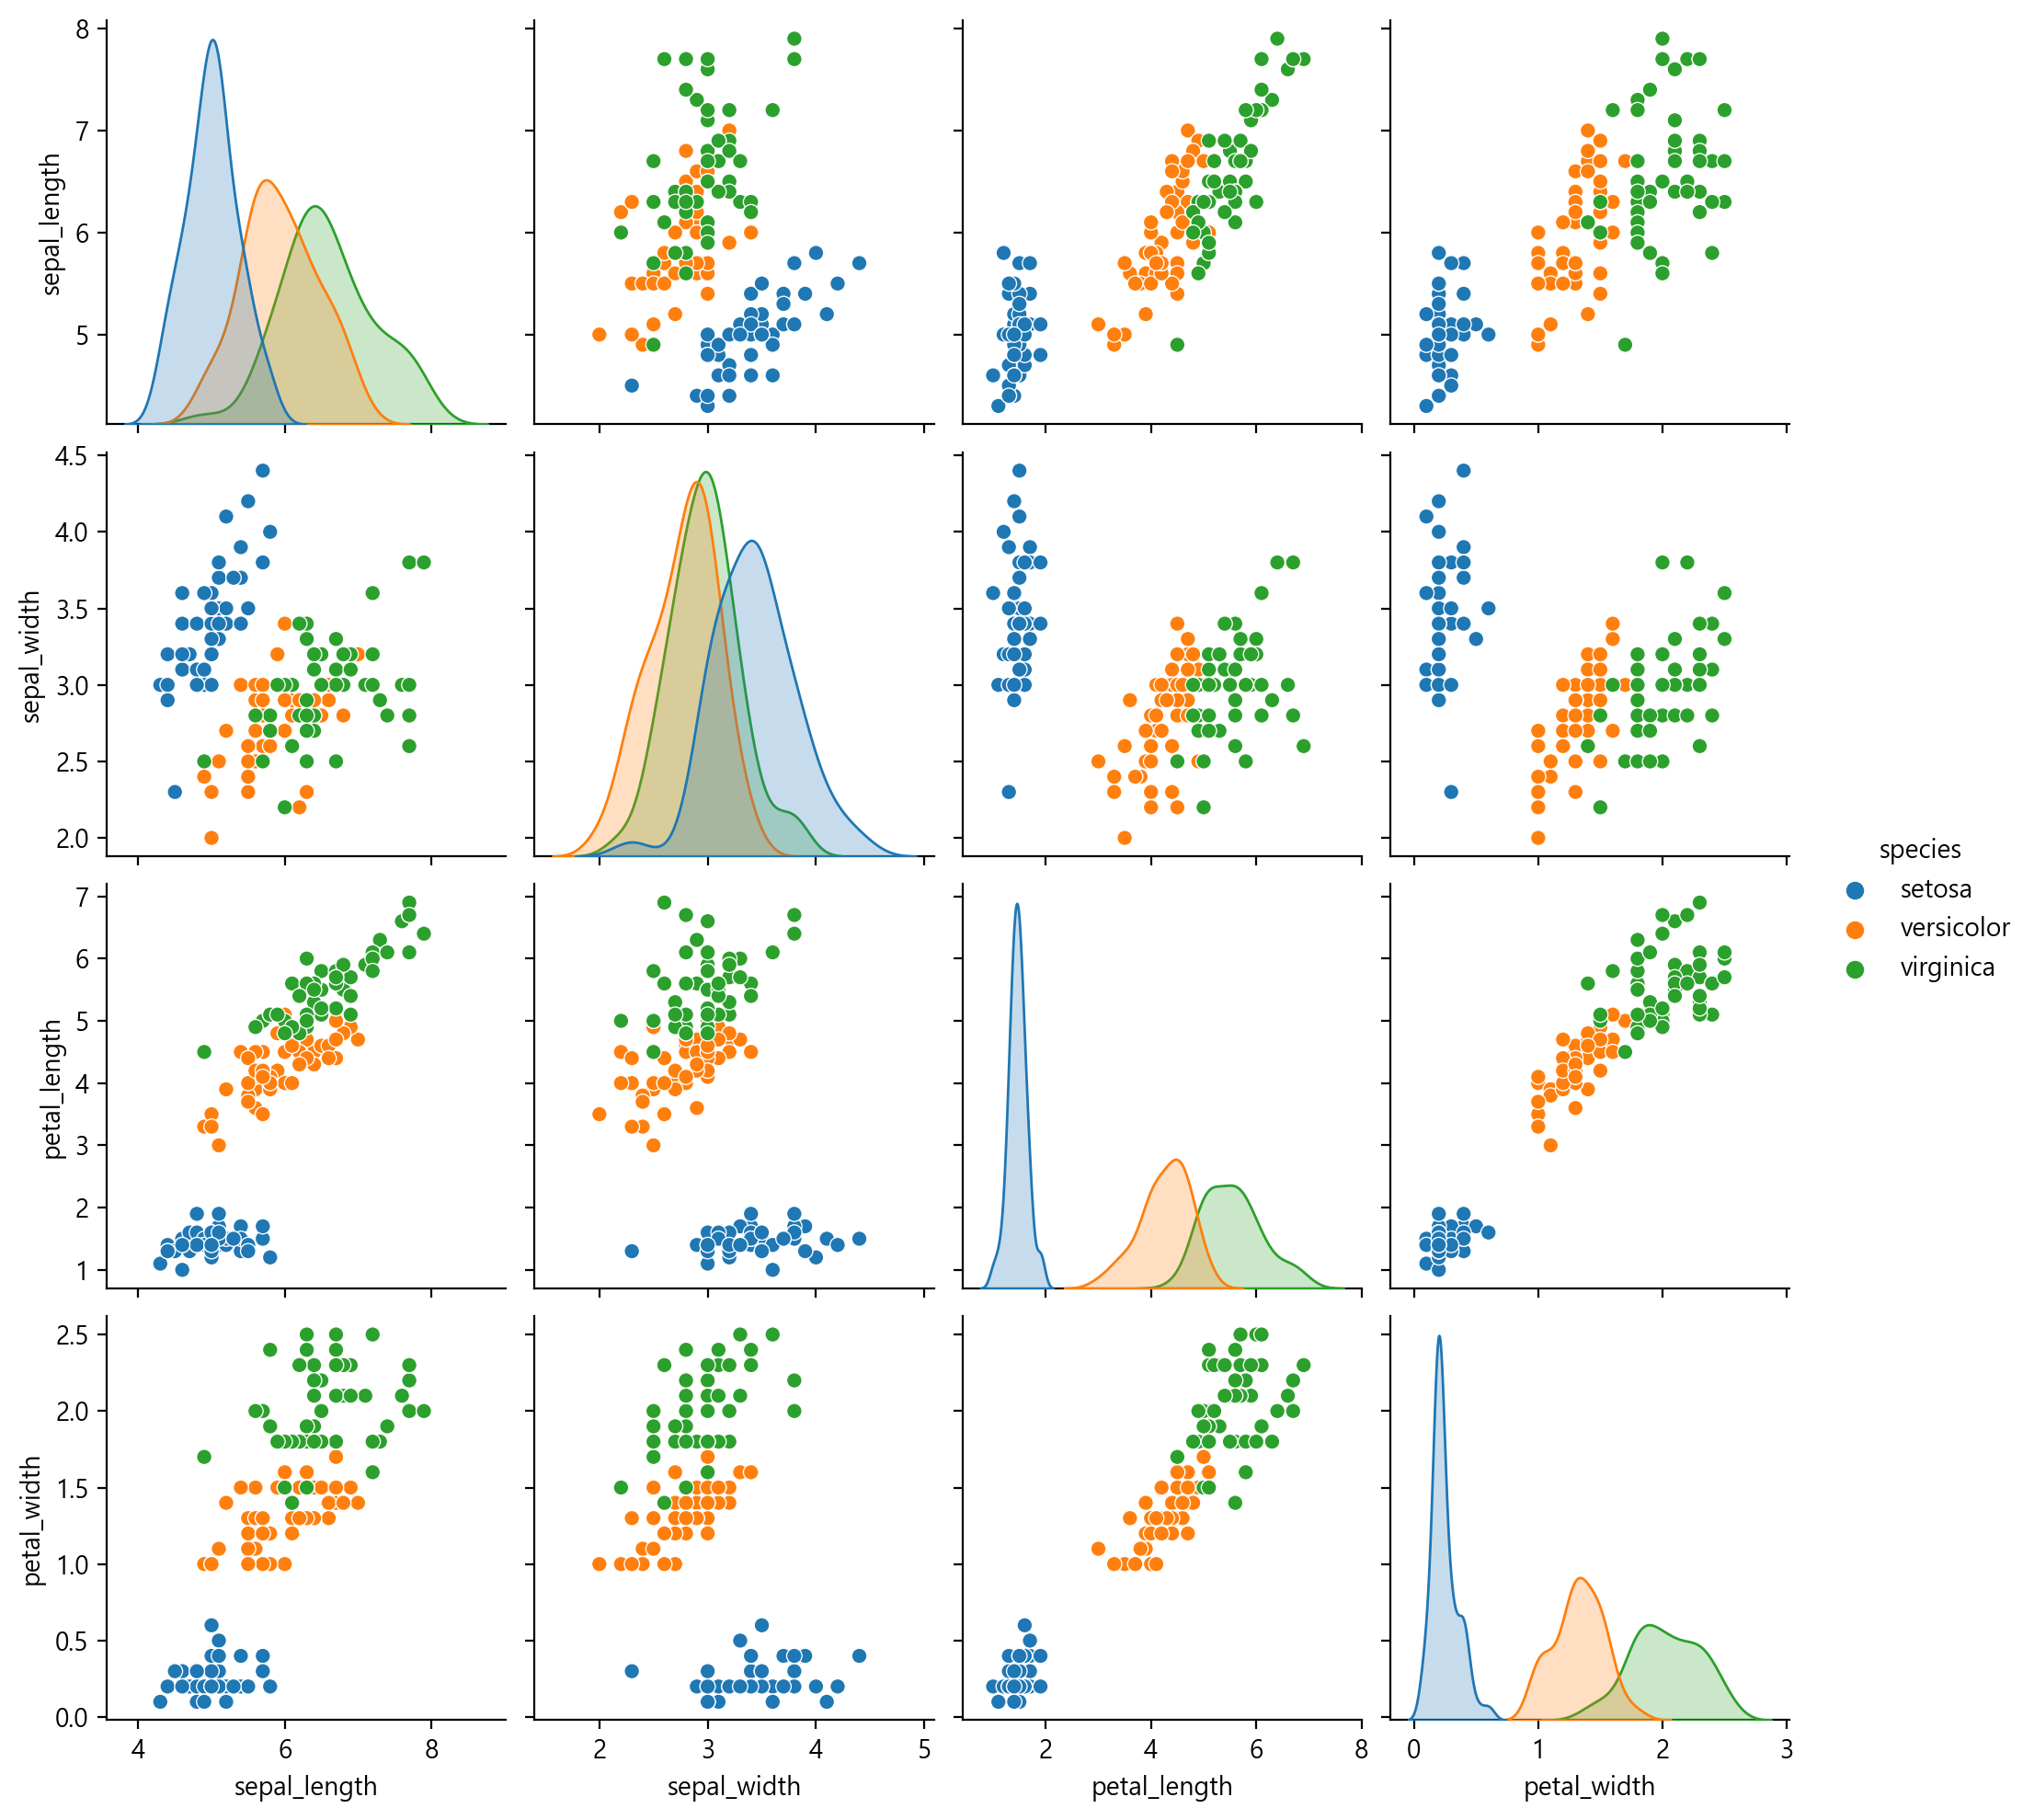

In [29]:
# pairplot을 이용하여 피처간의 분포와 상관관계 및 삼점도를 시각화

import seaborn as sns

sns.pairplot(iris, hue="species")
plt.show()

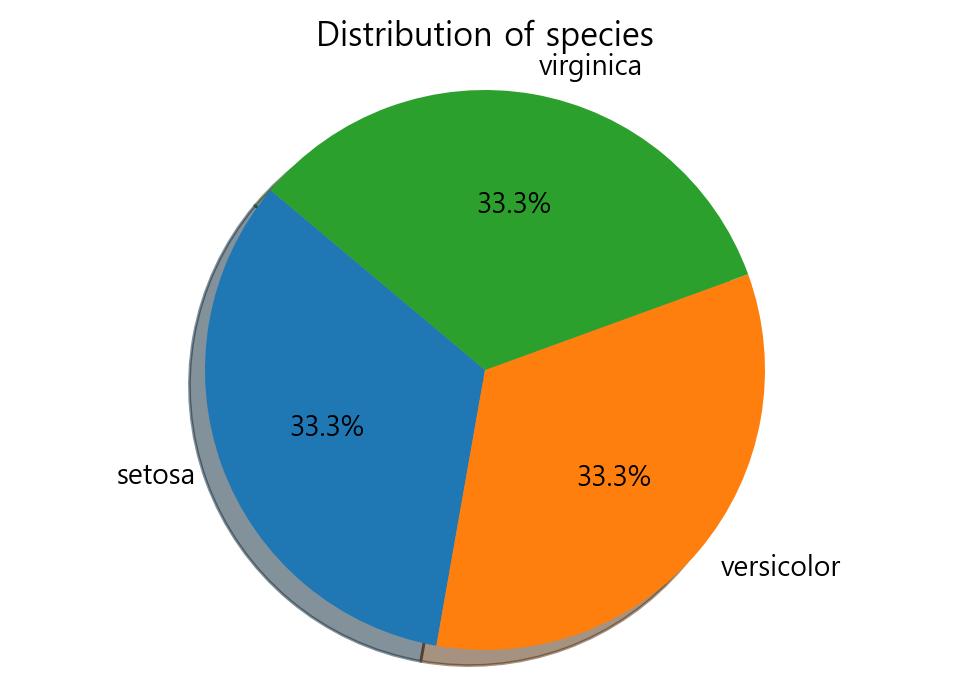

In [54]:
# piechart를 그려 타겟의 클래스 비율을 시각화

def piechart_iris(target, dataset):
    plt.figure(figsize=(6, 4))
    labels = []
    sizes = []
    df = dataset.groupby(target).size()
    for key in df.keys():
        labels.append(key)
        sizes.append(df[key])
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Distribution of ' + target)
    plt.show()
    
piechart_iris('species', iris)

## 학습1 : 홀드아웃 검증

In [55]:
# sklearn의 train_test_split 함수로 훈련용 데이터셋(70%)과 성능평가용 데이터셋(30) 분할 

#  scikit-learn model_selection 모듈은 train_test_split 함수로 X_train, X_test, y_train, y_test 데이터셋을 분할

# train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None,)
#  - stratify : 층 구분 변수이름을 입력, 이때 각 층(stratum, group) 별로 나누어서 test_size 비율을 적용해서 추출 
#  - test_size : test set의 비율 
#  - shuffle=True : 무작위 추출(random sampling) / shuffle=False : 체계적 추출(systematic sampling) 
#  - random_state : 재현가능성을 위해서 난수 초기값으로 아무 숫자나 지정

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], 
                                                    iris.iloc[:, -1], 
                                                    test_size=0.3, 
                                                    shuffle=True,             # shuffle=True : 무작위 추출(random sampling)
                                                    stratify=iris['species'], # stratify : 층 구분 변수이름 
                                                    random_state=42)          # 데이터셋 분할결과를 반환 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(105, 4) (45, 4) (105,) (45,)
setosa        35
versicolor    35
virginica     35
Name: species, dtype: int64
setosa        15
versicolor    15
virginica     15
Name: species, dtype: int64


In [56]:
# 데이터 분석 결과를 토대로 적합한 알고리즘을 선택

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1234) # 모델 생성  
model.fit(X_train, y_train)                       # 학습 

DecisionTreeClassifier(random_state=1234)

In [62]:
# 성능평가용 데이터셋을 이용해 성능을 평가 
# scikit-learn에서 score는 accuray(정확도)를 의미한다.

accuracy = np.round(model.score(X_test, y_test), 4)    
print('\n## 검증 정확도:', accuracy)  # 검증 정확도: 0.9778


## 검증 정확도: 0.9333


In [63]:
# 성능평가용 데이터셋을 이용해 성능을 평가 
# scikit-learn에서 accuracy_score 함수는 accuray(정확도)를 반환 

from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
accuracy = np.round(accuracy_score(y_test, pred), 4)
print('\n## 검증 정확도:', accuracy)  # 검증 정확도: 0.9778


## 검증 정확도: 0.9333


## 학습2 : 10겹 교차 검증 

In [46]:
# 빈도 출력 함수 : (key: 리스트요소, value: 빈도수)로 이루어진 딕셔너리 생성

import operator
from operator import itemgetter, attrgetter

def count_frequency(x_list):
    count = {}
    for item in x_list:
        count[item] = count.get(item, 0) + 1

    # 내림차순: 빈도수 높은 순으로 정렬
    sorted_count = sorted(count.items(), key = operator.itemgetter(1), reverse = True)         
       
    return sorted_count

In [47]:
# 데이터 분석 결과를 토대로 적합한 알고리즘을 선택

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1234)   # 모델 생성  

In [61]:
# StratifiedKFold 사용

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

sfld = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
cv_accuracy=[]           # KFold 별 정확도 저장 
n_iter = 0               # 반복횟수 

# StratifiedShuffleSplit 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_index, test_index in sfld.split(iris.iloc[:,:-1],iris['species']):
    print(train_index.shape, test_index.shape)
    
    # sfld.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train = iris.iloc[:,:-1].iloc[train_index] 
    X_test = iris.iloc[:,:-1].iloc[test_index]

    y_train = iris['species'].iloc[train_index]
    y_test = iris['species'].iloc[test_index]
    
    # 학습 및 예측
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    n_iter += 1          # 반복횟수 
    label_train = iris['species'].iloc[train_index]
    label_test = iris['species'].iloc[test_index]  
    print("n_iter=",n_iter,"\n",count_frequency(label_train), count_frequency(label_test))
    
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('교차 검증 정확도 :{0}, 학습 데이터 크기: {1}, 검증 데이터 크기: {2}'.format(accuracy, train_size, test_size))
    print('검증 세트 인덱스 :{0}'.format(test_index))
    print('------------------------------------------------------------')
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('검증 정확도 \n', cv_accuracy)
print('\n## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))  # 평균 검증 정확도: 0.9534

(105,) (45,)
n_iter= 1 
 [('virginica', 35), ('setosa', 35), ('versicolor', 35)] [('virginica', 15), ('setosa', 15), ('versicolor', 15)]
교차 검증 정확도 :0.9556, 학습 데이터 크기: 105, 검증 데이터 크기: 45
검증 세트 인덱스 :[136 142  39  44  50  23  90 149  46  55  21 147  47 123  67 134  68  65
  51   0  54 103  24  81 129 102 113 100  89 110  99  19   6  88  86 121
  85  37   9  61  36 109   3  12 139]
------------------------------------------------------------
(105,) (45,)
n_iter= 2 
 [('virginica', 35), ('setosa', 35), ('versicolor', 35)] [('versicolor', 15), ('setosa', 15), ('virginica', 15)]
교차 검증 정확도 :0.9333, 학습 데이터 크기: 105, 검증 데이터 크기: 45
검증 세트 인덱스 :[ 89  85  32  61 129  68  48 124  76  58  60  46   0  28 120 104   9  78
 116  22  80 145  17  30  36 123  54  97 133  25 147  77  27  16  84 143
  21 137 136  50 127 125  65 130  29]
------------------------------------------------------------
(105,) (45,)
n_iter= 3 
 [('virginica', 35), ('setosa', 35), ('versicolor', 35)] [('virginica', 15), ('setosa', 15),